In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



**Read in the Data**

In [2]:
xls_file = pd.ExcelFile('../data/raw/Data_Tables_LGA_Recorded_Offences_Year_Ending_March_2022.xlsx')

df1 = pd.read_excel(xls_file, 'Table 03') #with postcodes

**Show Details of the Data** 

In [3]:
df1.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count
0,2022,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,2
1,2022,March,Alpine,3691,Dederang,B Property and deception offences,B30 Burglary/Break and enter,B321 Residential non-aggravated burglary,1
2,2022,March,Alpine,3691,Dederang,B Property and deception offences,B50 Deception,B53 Obtain benefit by deception,1
3,2022,March,Alpine,3691,Dederang,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,1
4,2022,March,Alpine,3691,Kergunyah South,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1


In [4]:
df1.shape

(354716, 9)

In [5]:
df1.columns


Index(['Year', 'Year ending', 'Local Government Area', 'Postcode',
       'Suburb/Town Name', 'Offence Division', 'Offence Subdivision',
       'Offence Subgroup', 'Offence Count'],
      dtype='object')

In [6]:
df1['Year'].value_counts().sort_index()

2013    31526
2014    33191
2015    33652
2016    35733
2017    36504
2018    35726
2019    36664
2020    36739
2021    38239
2022    36742
Name: Year, dtype: int64

In [7]:
df1['Offence Division'].value_counts().sort_index()

A Crimes against the person              97514
B Property and deception offences       140058
C Drug offences                          25398
D Public order and security offences     45209
E Justice procedures offences            37955
F Other offences                          8582
Name: Offence Division, dtype: int64

In [8]:
LGAs = df1['Local Government Area'].unique()

In [9]:
LGAs

array(['Alpine', 'Ararat', 'Ballarat', 'Banyule', 'Bass Coast', 'Baw Baw',
       'Bayside', 'Benalla', 'Boroondara', 'Brimbank', 'Buloke',
       'Campaspe', 'Cardinia', 'Casey', 'Central Goldfields',
       'Colac-Otway', 'Corangamite', 'Darebin', 'East Gippsland',
       'Frankston', 'Gannawarra', 'Glen Eira', 'Glenelg', 'Golden Plains',
       'Greater Bendigo', 'Greater Dandenong', 'Greater Geelong',
       'Greater Shepparton', 'Hepburn', 'Hindmarsh', 'Hobsons Bay',
       'Horsham', 'Hume', 'Indigo', 'Kingston', 'Knox', 'Latrobe',
       'Loddon', 'Macedon Ranges', 'Manningham', 'Mansfield',
       'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton', 'Mildura',
       'Mitchell', 'Moira', 'Monash', 'Moonee Valley', 'Moorabool',
       'Moreland', 'Mornington Peninsula', 'Mount Alexander', 'Moyne',
       'Murrindindi', 'Nillumbik', 'Northern Grampians', 'Port Phillip',
       'Pyrenees', 'Queenscliffe', 'South Gippsland',
       'Southern Grampians', 'Stonnington', 'Strathbogie', 

In [10]:
#printing values from columns to ensure there are no strange looking values
for suburb in df1['Suburb/Town Name'].unique():
    print(suburb)

Dederang
Kergunyah South
Mongans Bridge
Upper Gundowring
Tawonga
Tawonga South
Mount Beauty
Barwidgee
Buffalo River
Dandongadale
Gapsted
Merriang
Mudgegonga
Myrtleford
Nug Nug
Wonnangatta
Ovens
Eurobin
Buckland
Mount Buffalo
Porepunkah
Bright
Harrietville
Smoko
Wandiligong
Dinner Plain
Lake Bolac
Mininera
Streatham
Ballyrogan
Buangor
Middle Creek
Ararat
Armstrong
Cathcart
Crowlands
Denicull Creek
Dobie
Maroona
Mount Cole
Moyston
Norval
Rhymney
Warrak
Tatyoon
Mafeking
Wickliffe
Willaura
Willaura North
Black Range
Pomonal
Elmhurst
Glenlogie
Alfredton
Bakery Hill
Ballarat Central
Ballarat East
Ballarat North
Black Hill
Brown Hill
Canadian
Eureka
Golden Point
Invermay Park
Lake Wendouree
Lucas
Mount Clear
Mount Helen
Mount Pleasant
Nerrina
Newington
Redan
Soldiers Hill
Bo Peep
Smythes Creek
Blowhard
Bonshaw
Bunkers Hill
Burrumbeet
Cardigan
Cardigan Village
Chapel Flat
Durham Lead
Glen Park
Gong Gong
Invermay
Learmonth
Magpie
Miners Rest
Mount Rowan
Scotsburn
Sulky
Warrenheip
Waubra
Weather

In [11]:
for postcode in df1['Postcode'].unique():
    print(postcode)

3691
3697
3698
3699
3737
3738
3739
3740
3741
3744
3898
3351
3375
3377
3378
3379
3381
3469
3350
3352
3355
3356
3357
3358
3363
3364
3079
3081
3083
3084
3085
3087
3088
3093
3094
3095
3922
3923
3925
3945
3951
3979
3984
3990
3991
3992
3995
3996
3816
3818
3820
3821
3822
3823
3824
3825
3831
3832
3833
3835
3871
3950
3988
3186
3187
3188
3190
3191
3192
3193
3670
3672
3673
3675
3725
3726
3101
3102
3103
3104
3122
3123
3124
3126
3127
3146
3147
3012
3020
3021
3022
3023
3026
3033
3036
3037
3038
3042
3043
3477
3478
3480
3482
3483
3525
3527
3529
3530
3531
3533
3523
3551
3557
3558
3559
3561
3562
3563
3564
3566
3572
3573
3612
3620
3621
3622
3623
3624
3159
3781
3782
3783
3807
3808
3809
3810
3812
3813
3814
3815
3978
3981
3987
3156
3177
3802
3803
3804
3805
3806
3912
3975
3976
3977
3980
3371
3464
3465
3472
3475
3233
3234
3236
3237
3238
3239
3241
3242
3243
3249
3250
3251
3254
3260
3266
3321
3322
3264
3265
3267
3268
3269
3270
3271
3323
3324
3325
3361
3070
3071
3072
3073
3078
3864
3865
3875
3878
3880
3882
3885


**Map suburbs with SA2 codes**


In [12]:
#read in suburbs shapefiles

property_data = pd.read_csv("../data/raw/full_property_zones.csv")

In [13]:
property_data.head()

,Unnamed: 0,index,name,cost_text,Bed,Bath,Park,property_type,desc_head,LocID
0,0,https://www.domain.com.au/3502-14-16-the-espla...,3502/14-16 The Esplanade St Kilda VIC 3182,5000.0,1,1,1,Apartment / Unit / Flat,noth els compar,206051514
1,1,https://www.domain.com.au/4203-35-spring-stree...,4203/35 Spring Street Melbourne VIC 3000,4500.0,3,2,2,Apartment / Unit / Flat,arguabl captiv penthous,206041503
2,2,https://www.domain.com.au/901-902-85-market-st...,901 & 902/85 Market Street South Melbourne VIC...,3750.0,2,2,1,Apartment / Unit / Flat,call exclus penthous short stay minimum week stay,206051512
3,3,https://www.domain.com.au/hawthorn-east-vic-31...,Hawthorn East VIC 3123,3750.0,4,2,3,House,luxuri finest month leas avail unfurnish fulli...,207011152
4,4,https://www.domain.com.au/50-south-wharf-drive...,50 South Wharf Drive Docklands VIC 3008,3750.0,2,2,1,Townhouse,luxuri style space,206041118


In [14]:
#split name/address to retrieve the postcode 
property_data['Postcodes'] = property_data['name'].str.split(" ").str[-1]

In [15]:
#new dataframe with postcodes and SA2 codes
postcodes_sa2_df = property_data[['LocID', 'Postcodes']]

In [16]:
df1['Postcode'] = df1['Postcode'].astype('str')

In [17]:
df1.dtypes

Year                      int64
Year ending              object
Local Government Area    object
Postcode                 object
Suburb/Town Name         object
Offence Division         object
Offence Subdivision      object
Offence Subgroup         object
Offence Count             int64
dtype: object

In [18]:
mapping = dict(property_data[['Postcodes', 'LocID']].values)


In [19]:
mapping

{'3182': 206051514,
 '3000': 206041504,
 '3205': 206051511,
 '3123': 207011152,
 '3008': 206041118,
 '3144': 208041194,
 '3122': 207011519,
 '3101': 207011522,
 '3186': 208011169,
 '3145': 208041195,
 '3015': 213021344,
 '3188': 208011172,
 '3053': 206041117,
 '3121': 206071518,
 '3124': 207011149,
 '3142': 206061138,
 '3184': 206051129,
 '3193': 208011168,
 '3103': 207011147,
 '3143': 206061135,
 '3191': 208011173,
 '3162': 208021178,
 '3199': 214011371,
 '3065': 206071142,
 '3141': 206061515,
 '3187': 208011170,
 '3006': 206041509,
 '3206': 206051128,
 '3002': 206041119,
 '3181': 206061136,
 '3183': 206051134,
 '3207': 206051130,
 '3126': 207011155,
 '3032': 213031349,
 '3003': 206041510,
 '3104': 207011148,
 '3102': 207011154,
 '3204': 208021182,
 '3146': 208041194,
 '3051': 206041506,
 '3066': 206071141,
 '3127': 207031167,
 '3052': 206011107,
 '3057': 206011106,
 '3068': 206071143,
 '3070': 206021500,
 '3185': 208021179,
 '3056': 206011495,
 '3161': 208021177,
 '3072': 209021428,


In [20]:
#perform the mapping
df1['SA2_codes'] = df1.Postcode.map(mapping)


In [21]:
#see how many values are null
df1['SA2_codes'].isna().sum()

204164

In [22]:
#remove all rows where SA2_code is null 
df1 = df1[df1['SA2_codes'].notna()]


**Observe Details of New Dataframe**

In [23]:
df1.shape

(150552, 10)

In [24]:
df1.dtypes

Year                       int64
Year ending               object
Local Government Area     object
Postcode                  object
Suburb/Town Name          object
Offence Division          object
Offence Subdivision       object
Offence Subgroup          object
Offence Count              int64
SA2_codes                float64
dtype: object

In [25]:
#change SA2_codes column from float to int datatype

df1["SA2_codes"] = df1["SA2_codes"].astype(int)

In [26]:
df1 = df1.reset_index(drop=True)

In [27]:
df1.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,SA2_codes
0,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,7,209011200
1,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,6,209011200
2,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",11,209011200
3,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,10,209011200
4,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,14,209011200


**Boxplot for offence count outlier visualisation**

In [28]:
df1_2021 = df1[df1["Year"]==2021]


In [29]:
#get top 20 suburbs with highest offence count in 2021 to sample for boxplot visualisation
n = 20
df1_2021.groupby(['Suburb/Town Name'])['Offence Count'].sum().nlargest(n)

Suburb/Town Name
Melbourne           21157
Dandenong            7415
Frankston            7149
Reservoir            5732
Werribee             4905
Richmond             4824
Preston              4738
St Kilda             4684
St Albans            4359
Craigieburn          4093
Epping               3624
Southbank            3578
Cranbourne           3372
Docklands            3282
Broadmeadows         3268
South Yarra          3245
Hoppers Crossing     2953
Ringwood             2813
Noble Park           2762
South Melbourne      2727
Name: Offence Count, dtype: int64

In [30]:
#filtered suburbs by top 20

top_20_suburbs = ['Melbourne', 'Frankston', 'Reservoir', 'Preston', 'Werribee', 'Dandenong', 'Richmond', 'St Kilda', 
                 'St Albans', 'Pakenham', 'South Yarra', 'Epping', 'Mildura', 'Traralgon', 'Craigieburn', 'Cranbourne',
                  'Noble Park', 'Docklands', 'Ringwood', 'Shepparton']

df1_2021_filtered_top_20 = df1_2021[df1_2021['Suburb/Town Name'].isin(top_20_suburbs)]

In [31]:
df1_2021_filtered_top_20

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,SA2_codes
17234,2021,March,Brimbank,3021,St Albans,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,76,213011334
17235,2021,March,Brimbank,3021,St Albans,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,56,213011334
17236,2021,March,Brimbank,3021,St Albans,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",30,213011334
17237,2021,March,Brimbank,3021,St Albans,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,133,213011334
17238,2021,March,Brimbank,3021,St Albans,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,84,213011334
...,...,...,...,...,...,...,...,...,...,...
30588,2021,March,Yarra,3121,Richmond,E Justice procedures offences,E20 Breaches of orders,E29 Breach of other orders,2,206071518
30589,2021,March,Yarra,3121,Richmond,F Other offences,F20 Transport regulation offences,F21 Public transport,5,206071518
30590,2021,March,Yarra,3121,Richmond,F Other offences,F30 Other government regulatory offences,F33 Liquor and tobacco licensing offences,1,206071518
30591,2021,March,Yarra,3121,Richmond,F Other offences,F90 Miscellaneous offences,F92 Public health and safety offences,541,206071518


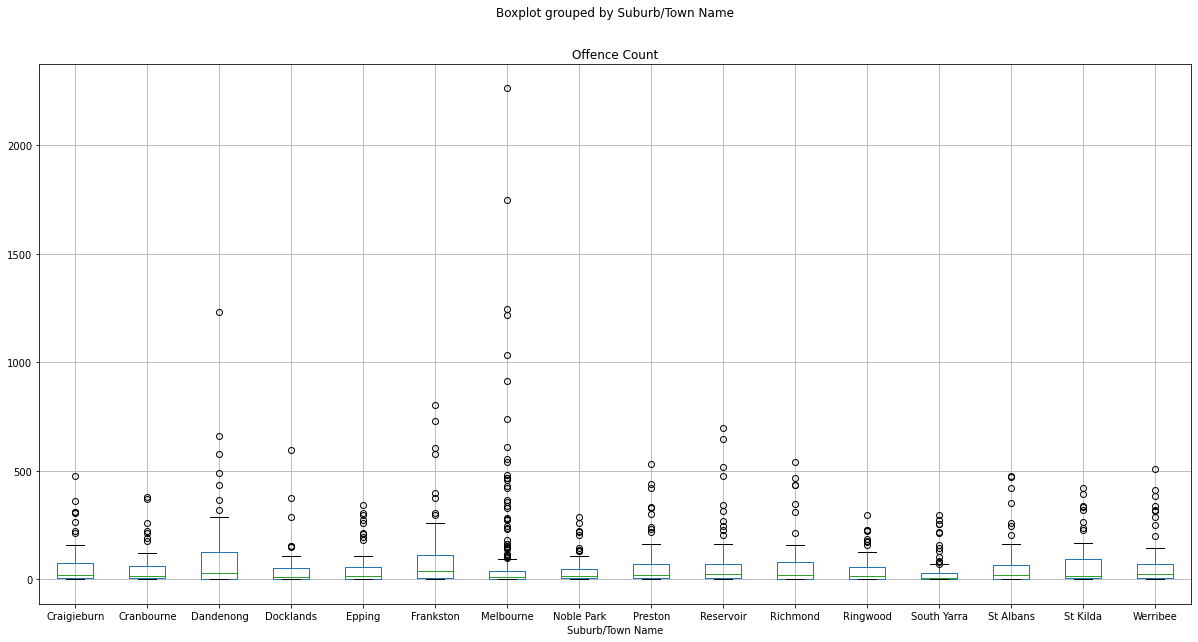

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))


df1_2021_filtered_top_20.boxplot(column=['Offence Count'], by='Suburb/Town Name', ax=ax)
fig.savefig("../plots/offence_counts_plot.png")

**Remove Outliers by Year and Suburb**

In [33]:
def outliers_iqr(column):
    """Removes outliers per the IQR method"""
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (column> upper_bound) | (column< lower_bound)

In [34]:
#remove offence count outliers outliers based on each Year and Suburb Name 

processed_df = df1[~df1.groupby(['Year', 'Suburb/Town Name'])['Offence Count'].apply(outliers_iqr)]

In [36]:
processed_df.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Offence Count,SA2_codes
0,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,7,209011200
1,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,6,209011200
2,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",11,209011200
3,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,10,209011200
4,2022,March,Banyule,3079,Ivanhoe,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,14,209011200


**Group by Year and Offence Division for Boxplot Visualisation**

In [40]:
groups_of_crime_by_year = processed_df.groupby(['Year'])['Offence Division'].value_counts().sort_index()


In [41]:
groups_of_crime_by_year = groups_of_crime_by_year.to_frame()

In [42]:
groups_of_crime_by_year

Offence Division
Year Offence Division                                      
2013 A Crimes against the person                       3942
     B Property and deception offences                 3638
     C Drug offences                                   1068
     D Public order and security offences              2088
     E Justice procedures offences                     1211
     F Other offences                                   405
2014 A Crimes against the person                       4020
     B Property and deception offences                 3759
     C Drug offences                                   1109
     D Public order and security offences              2232
     E Justice procedures offences                     1322
     F Other offences                                   397
2015 A Crimes against the person                       4106
     B Property and deception offences                 3825
     C Drug offences                                   1086
     D Public order and security offences              2212
     E Justice procedures offences                     1433
     F Other offences                                   398
2016 A Crimes against the person                       4284
     B Property and deception offences                 3895
     C Drug offences                                   1118
     D Public order and security offences              2258
     E Justice procedures offences                     1519
     F Other offences                                   404
2017 A Crimes against the person                       4411
     B Property and deception offences                 3895
     C Drug offences                                   1071
     D Public order and security offences              2257
     E Justice procedures offences                     1527
     F Other offences                                   359
2018 A Crimes against the person                       4351
     B Property and deception offences                 3908
     C Drug offences                                   1026
     D Public order and security offences              2200
     E Justice procedures offences                     1476
     F Other offences                                   387
2019 A Crimes against the person                       4398
     B Property and deception offences                 3994
     C Drug offences                                    981
     D Public order and security offences              2256
     E Justice procedures offences                     1526
     F Other offences                                   391
2020 A Crimes against the person                       4376
     B Property and deception offences                 3928
     C Drug offences                                   1004
     D Public order and security offences              2171
     E Justice procedures offences                     1542
     F Other offences                                   316
2021 A Crimes against the person                       4424
     B Property and deception offences                 4141
     C Drug offences                                   1071
     D Public order and security offences              2223
     E Justice procedures offences                     1620
     F Other offences                                   441
2022 A Crimes against the person                       4407
     B Property and deception offences                 4036
     C Drug offences                                   1011
     D Public order and security offences              2081
     E Justice procedures offences                     1503
     F Other offences                                   555

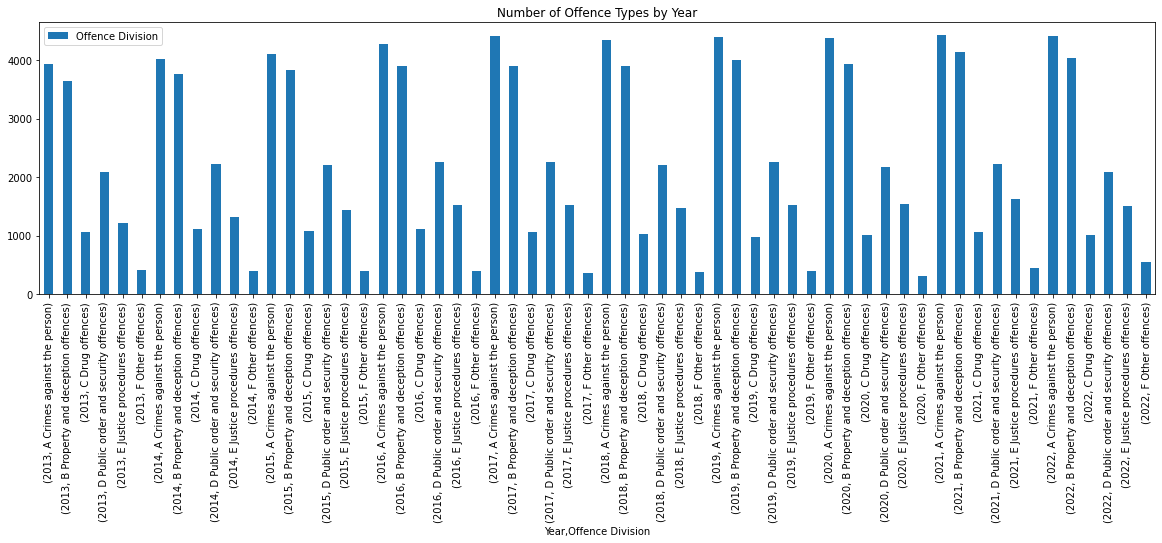

In [43]:
groups_of_crime_by_year.plot(kind='bar', figsize=(20,5), title="Number of Offence Types by Year")
fig.savefig("../plots/num_offences_per_year.png")


We observe that property and deception offences occur with the highest frequency

In [46]:
#detail offence subtypes
offence_subdivision_types = processed_df.groupby('Offence Division')['Offence Subdivision'].apply(lambda x: list(np.unique(x)))

In [47]:
offence_subdivision_types

Offence Division
A Crimes against the person             [A20 Assault and related offences, A50 Robbery...
B Property and deception offences       [B10 Arson, B20 Property damage, B30 Burglary/...
C Drug offences                         [C10 Drug dealing and trafficking, C20 Cultiva...
D Public order and security offences    [D10 Weapons and explosives offences, D20 Diso...
E Justice procedures offences            [E10 Justice procedures, E20 Breaches of orders]
F Other offences                        [F10 Regulatory driving offences, F20 Transpor...
Name: Offence Subdivision, dtype: object

In [48]:
offence_subdivision_types.value_counts()

[A20 Assault and related offences, A50 Robbery, A70 Stalking, harassment and threatening behaviour, A80 Dangerous and negligent acts endangering people, Other crimes against the person]    1
[B10 Arson, B20 Property damage, B30 Burglary/Break and enter, B40 Theft, B50 Deception, B60 Bribery]                                                                                        1
[C10 Drug dealing and trafficking, C20 Cultivate or manufacture drugs, C30 Drug use and possession, C90 Other drug offences]                                                                 1
[D10 Weapons and explosives offences, D20 Disorderly and offensive conduct, D30 Public nuisance offences, D40 Public security offences]                                                      1
[E10 Justice procedures, E20 Breaches of orders]                                                                                                                                             1
[F10 Regulatory driving offences, F20 Transpo

We observe a fairly even distribution of the different offence types across all the years 

In [49]:
#we can see there are no missing values in our dataframe
processed_df.isnull().sum()

Year                     0
Year ending              0
Local Government Area    0
Postcode                 0
Suburb/Town Name         0
Offence Division         0
Offence Subdivision      0
Offence Subgroup         0
Offence Count            0
SA2_codes                0
dtype: int64

**Visualise Offence Count By Year**

In [50]:
offence_count_by_year= processed_df.groupby('Year')['Offence Count'].sum()

In [51]:
offence_count_by_year = offence_count_by_year.to_frame()


In [52]:
offence_count_by_year = offence_count_by_year.reset_index()

In [53]:
offence_count_by_year

,Year,Offence Count
0,2013,108802
1,2014,114858
2,2015,123436
3,2016,135534
4,2017,137742
5,2018,137217
6,2019,138485
7,2020,139221
8,2021,150832
9,2022,134196


Text(0.5, 1.0, 'Offence Count by Year')

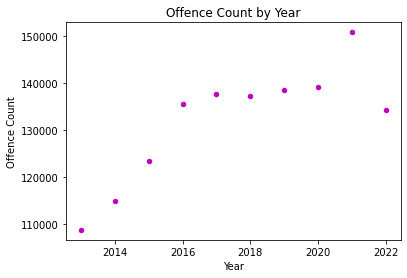

In [54]:
plot = offence_count_by_year.plot.scatter(x='Year', y='Offence Count', c="m", s=20)

fig = plot.get_figure()
fig.savefig("../plots/crime_growth.png")
plt.title("Offence Count by Year")


We can see the number of offences has dropped in 2022 and is at an all time high in 2021, but keep in mind the year isn't over yet so this may not be an accurate representation. We would expect crime to shoot up in the holiday/christmas period of 2022, and for the rise in crime to follow a roughly linear trend  

**Visualise the Offence Count per LGA**

In [55]:
offence_count_by_LGA = processed_df.groupby('Local Government Area')['Offence Count'].sum().sort_values(ascending=False)

In [56]:
type(offence_count_by_LGA)

pandas.core.series.Series

In [57]:
offence_count_by_LGA.head(30)

Local Government Area
Casey                89656
Melbourne            89325
Brimbank             84209
Greater Dandenong    75104
Frankston            64394
Hume                 63835
Yarra                59160
Port Phillip         57744
Kingston             51248
Wyndham              51104
Knox                 49213
Moreland             48938
Darebin              47722
Monash               44769
Whittlesea           40780
Maribyrnong          38399
Moonee Valley        37828
Banyule              37755
Maroondah            37370
Stonnington          37017
Whitehorse           36378
Glen Eira            32766
Hobsons Bay          29911
Boroondara           28488
Bayside              23400
Yarra Ranges         20468
Manningham           18135
Melton               15581
Nillumbik             9626
Name: Offence Count, dtype: int64

In [58]:
offence_count_by_LGA.tail(30)

Local Government Area
Casey                89656
Melbourne            89325
Brimbank             84209
Greater Dandenong    75104
Frankston            64394
Hume                 63835
Yarra                59160
Port Phillip         57744
Kingston             51248
Wyndham              51104
Knox                 49213
Moreland             48938
Darebin              47722
Monash               44769
Whittlesea           40780
Maribyrnong          38399
Moonee Valley        37828
Banyule              37755
Maroondah            37370
Stonnington          37017
Whitehorse           36378
Glen Eira            32766
Hobsons Bay          29911
Boroondara           28488
Bayside              23400
Yarra Ranges         20468
Manningham           18135
Melton               15581
Nillumbik             9626
Name: Offence Count, dtype: int64

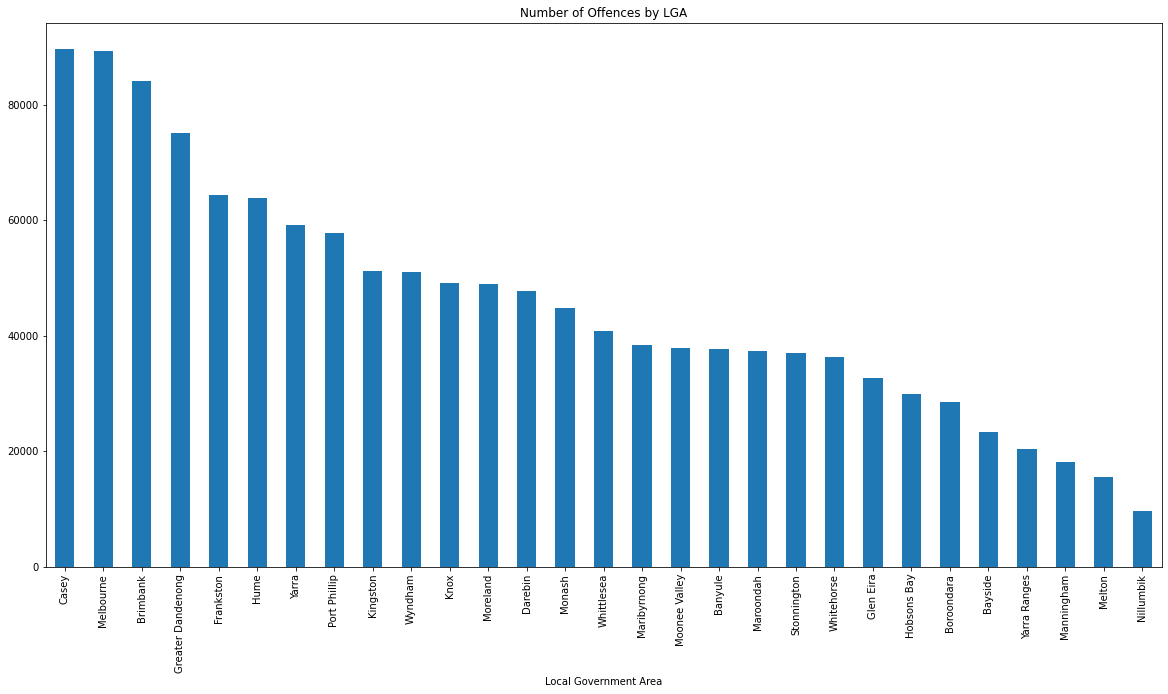

In [59]:
offence_count_by_LGA.plot(kind='bar', figsize=(20,10), title="Number of Offences by LGA")

fig.savefig("../plots/offences_per_LGA.png")

**Now let's observe the number of offences by suburb** 

We've grouped all types of offences in one for a general offence count.

In [60]:
offence_count_by_suburb = processed_df.groupby('Suburb/Town Name')['Offence Count'].sum().sort_values(ascending=False)


In [62]:
#top 20
offence_count_by_suburb = offence_count_by_suburb.head(20)

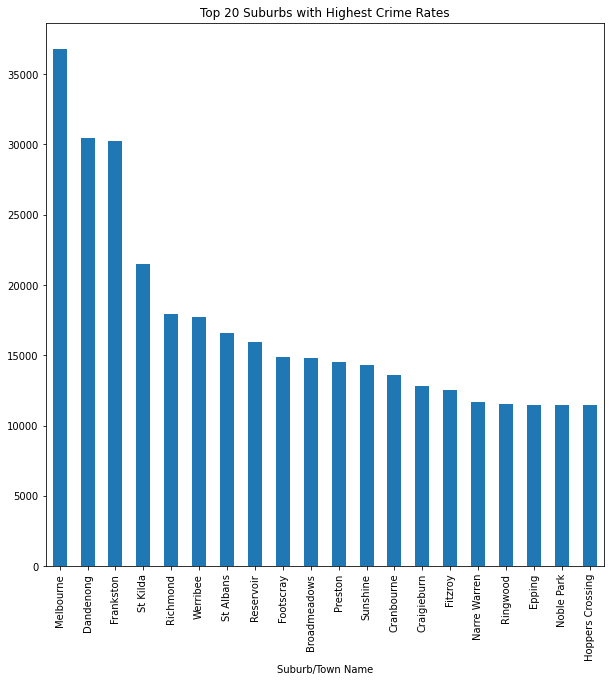

In [63]:
plot = offence_count_by_suburb.plot(kind='bar', y='Offence Count', figsize=(10,10), 
                                    title="Top 20 Suburbs with Highest Crime Rates")
fig = plot.get_figure()
fig.savefig("../plots/crime_by_suburb.png")

**Create new dataframe with sum of Total Offences per SA2_code by Year**

In [67]:
#for each year and SA2 code, how many offences are there?

crime_data_processed = processed_df.groupby(["Year", "SA2_codes", "Postcode"], as_index=False)['Offence Count'].sum()



In [68]:
crime_data_processed

,Year,SA2_codes,Postcode,Offence Count
0,2013,206011106,3057,156
1,2013,206011107,3052,552
2,2013,206011107,3055,229
3,2013,206011109,3044,514
4,2013,206011495,3056,732
...,...,...,...,...
1795,2022,214011370,3201,675
1796,2022,214011371,3199,2994
1797,2022,214011372,3200,437
1798,2022,214011374,3910,344


In [63]:
crime_data_means = crime_data_processed.groupby(['Year', 'SA2_codes'], as_index=False).mean()

In [64]:
crime_data_means.to_csv("../data/curated/crime_data_means.csv")

In [54]:
crime_data_processed.to_csv("../data/curated/crime_data.csv")

